Mean Squared Error: 65226.5350506074
R-squared: -0.2860114291264413
    Test    Predicted
83   406   770.708908
53   679   703.266161
70   406   636.751567
45   399   306.737443
44   488   560.205705
39   233   225.419239
22   737   165.254612
80   424   461.049604
10   310   267.081233
0    473   172.064215
18    61    47.242297
30   102    38.800627
73   237   427.705152
33   232   325.554866
90   605   883.448644
4     50   -42.992364
76    58    55.333047
77   184    67.006735
12   663  1237.623659
31   760  1211.505397


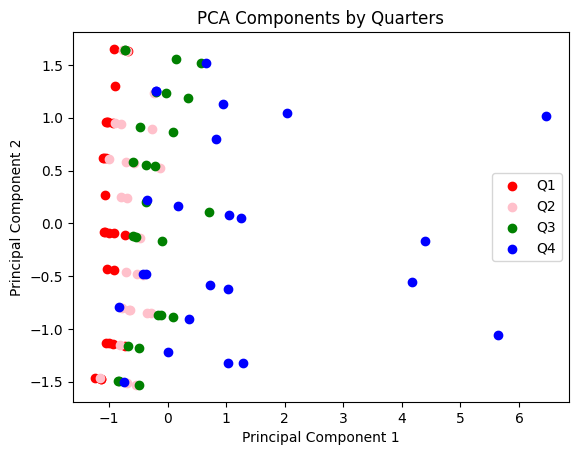

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame (replace 'data.csv' with your actual data file)
data = pd.read_csv('41-50.csv')

# Separate features (independent variables) and the target variable
X = data[['univ_rank', 'cit_2017', 'cit_2018', 'cit_2019', 'cit_2020', 'cit_2021']]
y = data['cit_2022']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
n_components = 2  # Choose the number of principal components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Divide the data into 4 quarters based on the target variable (2022 citation numbers)
percentiles = np.percentile(y, [0, 25, 50, 75, 100])
colors = ['red', 'pink', 'green', 'blue']
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']
quarter_assignments = np.digitize(y, percentiles) - 1  # Assign quarters based on percentiles

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, quarter_train, quarter_test = train_test_split(
    X_pca, y, quarter_assignments, test_size=0.2, random_state=42)

# Train a linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions
y_pred = regression_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

compareRes = pd.DataFrame({"Test" : y_test, "Predicted" : y_pred})
print(compareRes)

# Plot the PCA components with different colors for quarters
for i in range(4):
    plt.scatter(X_pca[quarter_assignments == i, 0], X_pca[quarter_assignments == i, 1], c=colors[i], label=quarter_labels[i])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Components by Quarters')
plt.legend()
plt.show()
